# <span style="color:orange">25/05 - Pair Regresión 1- Alicia y Lidia</span>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Buscar un conjunto de datos a analizar:
- Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas y limpio.

In [12]:
df = pd.read_csv('tiktok_top_1000.csv', index_col=0)
df

,Rank,Account,Title,Link,Subscribers count,Views avg.,Likes avg.,Comments avg.,Shares avg.,Scraped
Country,,,,,,,,,,
All,1,billieeilish,BILLIE EILISH,https://www.tiktok.com/@billieeilish,41600000.0,95000000.0,18100000.0,151000.0,54800.0,2022-02-07 16:54:35.641971
All,2,badbunny,Bad Bunny,https://www.tiktok.com/@badbunny,13400000.0,33300000.0,7300000.0,101900.0,106800.0,2022-02-07 16:54:35.641971
All,3,chipmunksoftiktok,Chipmunks of TikTok,https://www.tiktok.com/@chipmunksoftiktok,11400000.0,25000000.0,3000000.0,21800.0,64200.0,2022-02-07 16:54:35.641971
All,4,charlidamelio,charli d’amelio,https://www.tiktok.com/@charlidamelio,135400000.0,18700000.0,2600000.0,54700.0,35200.0,2022-02-07 16:54:35.641971
All,5,yessicadcs,Yessica y Moises 🦜,https://www.tiktok.com/@yessicadcs,263700.0,16700000.0,1400000.0,16200.0,138400.0,2022-02-07 16:54:35.641971
...,...,...,...,...,...,...,...,...,...,...
All,996,leleburnier,LELÊ BURNIER,https://www.tiktok.com/@leleburnier,1100000.0,1200000.0,284300.0,2800.0,968.0,2022-02-07 16:54:35.641971
All,997,sofiadelmonstro,Cat Sofia,https://www.tiktok.com/@sofiadelmonstro,5200000.0,2600000.0,161200.0,1300.0,1600.0,2022-02-07 16:54:35.641971
All,998,jena,Jena,https://www.tiktok.com/@jena,10500000.0,2800000.0,320300.0,856.0,512.0,2022-02-07 16:54:35.641971


In [13]:
df = df.reset_index()

Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
-  Esto se hace para que comprendais mejor los datos con los que estais trabajando.
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.


    Hacemos una limpieza inicial de las columnas que no vamos a utilizar.

In [14]:
df.head()

,Country,Rank,Account,Title,Link,Subscribers count,Views avg.,Likes avg.,Comments avg.,Shares avg.,Scraped
0,All,1,billieeilish,BILLIE EILISH,https://www.tiktok.com/@billieeilish,41600000.0,95000000.0,18100000.0,151000.0,54800.0,2022-02-07 16:54:35.641971
1,All,2,badbunny,Bad Bunny,https://www.tiktok.com/@badbunny,13400000.0,33300000.0,7300000.0,101900.0,106800.0,2022-02-07 16:54:35.641971
2,All,3,chipmunksoftiktok,Chipmunks of TikTok,https://www.tiktok.com/@chipmunksoftiktok,11400000.0,25000000.0,3000000.0,21800.0,64200.0,2022-02-07 16:54:35.641971
3,All,4,charlidamelio,charli d’amelio,https://www.tiktok.com/@charlidamelio,135400000.0,18700000.0,2600000.0,54700.0,35200.0,2022-02-07 16:54:35.641971
4,All,5,yessicadcs,Yessica y Moises 🦜,https://www.tiktok.com/@yessicadcs,263700.0,16700000.0,1400000.0,16200.0,138400.0,2022-02-07 16:54:35.641971


In [15]:
df.drop(['Link', 'Country', 'Scraped', 'Title'], axis=1, inplace=True)

In [16]:
df.columns

Index(['Rank', 'Account', 'Subscribers count', 'Views avg.', 'Likes avg.',
       'Comments avg.', 'Shares avg.'],
      dtype='object')

In [17]:
df.dtypes

Rank                   int64
Account               object
Subscribers count    float64
Views avg.           float64
Likes avg.           float64
Comments avg.        float64
Shares avg.          float64
dtype: object

    Vemos que hay mayusculas y minusculas en el nombre de las columnas y pasamos a ponerlas todas de un mismo tipo.

In [18]:
nuevas_columnas = {col:col.replace(" ","_").lower()for col in df.columns}
df.rename(columns = nuevas_columnas, inplace = True)

In [19]:
df.head(15)

,rank,account,subscribers_count,views_avg.,likes_avg.,comments_avg.,shares_avg.
0,1,billieeilish,41600000.0,95000000.0,18100000.0,151000.0,54800.0
1,2,badbunny,13400000.0,33300000.0,7300000.0,101900.0,106800.0
2,3,chipmunksoftiktok,11400000.0,25000000.0,3000000.0,21800.0,64200.0
3,4,charlidamelio,135400000.0,18700000.0,2600000.0,54700.0,35200.0
4,5,yessicadcs,263700.0,16700000.0,1400000.0,16200.0,138400.0
5,6,therock,49700000.0,24700000.0,3000000.0,30900.0,16400.0
6,7,the_pruld,433300.0,12200000.0,2700000.0,36300.0,56600.0
7,8,lukedonkin,2000000.0,14000000.0,2400000.0,34000.0,54900.0
8,9,mastertingus,1300000.0,13400000.0,2000000.0,32500.0,44100.0
9,10,txt.bighitent,15300000.0,7200000.0,2200000.0,57200.0,31000.0


In [20]:
#df['media_total'] = df['views_avg.'[0]+ 'likes_avg.'[0] + 'comments_avg.'[0] + 'shares_avg.'[0]]/4

In [21]:
df['likes_avg.'].value_counts()

1100000.0    13
1600000.0    10
1200000.0    10
1000000.0     7
1400000.0     5
             ..
412900.0      1
330700.0      1
318800.0      1
376800.0      1
320300.0      1
Name: likes_avg., Length: 874, dtype: int64

In [22]:
pd.set_option("display.float_format",lambda x: "%3.f" %x) #Usamos esta linea de código para que no aparezca los exponenciales
df.describe()

,rank,subscribers_count,views_avg.,likes_avg.,comments_avg.,shares_avg.
count,1000,1000,1000,1000,1000,1000
mean,500,7049170,3700866,453741,4559,10681
std,289,10872669,4697164,696476,7766,167772
min,1,4300,585300,31000,0,212
25%,251,1400000,1800000,230450,1600,1200
50%,500,3700000,2600000,320200,2800,2400
75%,750,8625000,4000000,478375,4900,5400
max,1000,135400000,95000000,18100000,151000,5300000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               1000 non-null   int64  
 1   account            1000 non-null   object 
 2   subscribers_count  1000 non-null   float64
 3   views_avg.         1000 non-null   float64
 4   likes_avg.         1000 non-null   float64
 5   comments_avg.      1000 non-null   float64
 6   shares_avg.        1000 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB


In [24]:
df.stb.missing()

,missing,total,percent
rank,0,1000,0
account,0,1000,0
subscribers_count,0,1000,0
views_avg.,0,1000,0
likes_avg.,0,1000,0
comments_avg.,0,1000,0
shares_avg.,0,1000,0


    Como podemos observar en nuestra tabla de valores nulos, tenemos un DF bastante limpio.

In [25]:
df.shape

(1000, 7)

    Confirmamos que tenemos 1000 filas por los 1000 artistas más famoso de Tiktok.

     Al ver que no tenemos nulos y que nuestras variables tienen diferentes valores, vemos poco informativo comprobar los valores únicos(unique) y su frecuencia(value_counts).

Realiza el ajuste lineal simple utilizando diversas métricas y realiza una gráfica mostrando los resultados e interpretalos.

In [26]:
x=df['views_avg.'].values.reshape(-1, 1) # Le hacemos el reshape ya que el modelo espera que le pasemos un array de 2 dimensiones con una única columna.
y= df['rank'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [27]:
LR = LinearRegression(n_jobs=-1)
LR.fit(x_train, y_train)
y_predict_train = LR.predict(x_train)
y_prediction = LR.predict(x_test)

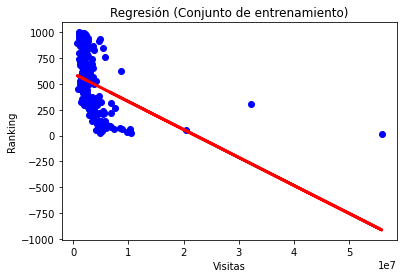

In [28]:
plt.scatter(x_test,y_test,color="blue")  # Plot a graph with X_train vs y_train
plt.plot(x_test,y_prediction,color="red",linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel('Visitas')
plt.ylabel('Ranking')
plt.show()

In [29]:
# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


Para el conjunto train:---------------
El valor de r2 score es  0.19027064615369293
El MAE es 219.20174069271343
El MSE es 67784.19597769328
EL RMSE es  260.35398206613485


In [30]:
# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('El MSE es',mean_squared_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto test:---------------
El valor de r2 score es  0.14396831076211736
El MAE es 227.197003791162
El MSE es 69964.29549697245
EL RMSE es  264.5076473317406


    En general para las métricas, cuanto menor sea el valor obtenido, mejor es capaz de ajustar los datos del modelo que hemos creado